# Project

The aim of the project was to answer questions related to Stackoverflow's survey. A blog where the questions are discussed can be found here:
https://medium.com/@alicja.roelofsen/what-makes-a-developer-f1d8f82ebc19

### Gather

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, fbeta_score
import seaborn as sns
%matplotlib inline

In [2]:
df_original = pd.read_csv('./survey_results_public.csv')

### Assess

Please note that large part of the assesment has been done on the downloaded survay schema, in excel, where it was easier to scroll through the large number od columns.

In [3]:
df_original.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Question 1

Is there correlation between the education of responders (developers, analysts) and the level of education of their parents?

In [4]:
# choose the columns of interest
df1 = df_original.copy()
df1 = df1[['HighestEducationParents', 'FormalEducation']] 

# clean data 
df1 = df1[(df1['HighestEducationParents'] != "I prefer not to answer") & (df1['HighestEducationParents'] != "I don't know/not sure") & (df1['FormalEducation'] != "I prefer not to answer")]
df1 = df1.dropna(subset=['HighestEducationParents', 'FormalEducation'], how='any')

df1.head(5)

,HighestEducationParents,FormalEducation
0,High school,Secondary school
1,A master's degree,Some college/university study without earning ...
2,A professional degree,Bachelor's degree
3,A doctoral degree,Doctoral degree
5,A bachelor's degree,Secondary school


In [5]:
# reduce the cathegorical columns
# clean (there are differences between choices, e.g. "A doctoral degree" vs "Doctoral degree"), so unify 
profession_map = {'A bachelor\'s degree': 'University (Bachelor, other)', 
                  'Bachelor\'s degree': 'University (Bachelor, other)', 
                  'A doctoral degree': 'University (Master, Doctoral)', 
                  'Doctoral degree': 'University (Master, Doctoral)', 
                  'A master\'s degree': 'University (Master, Doctoral)',
                  'Master\'s degree': 'University (Master, Doctoral)',
                  'High school': 'School',
                  'Secondary school': 'School',
                  'Some college/university study, no bachelor\'s degree': 'University (Bachelor, other)',
                  'Some college/university study without earning a bachelor\'s degree': 'University (Bachelor, other)',
                  'A professional degree': 'School',
                  'Professional degree': 'School',
                  'Primary/elementary school': 'School',
                  'No education': 'No education',
                  'I never completed any formal education':'No education'
                  }
df1['HighestEducationParents'] = df1['HighestEducationParents'].map(profession_map)
df1['FormalEducation'] = df1['FormalEducation'].map(profession_map)
df1['count'] = 1

In [6]:
df1.head()

,HighestEducationParents,FormalEducation,count
0,School,School,1
1,"University (Master, Doctoral)","University (Bachelor, other)",1
2,School,"University (Bachelor, other)",1
3,"University (Master, Doctoral)","University (Master, Doctoral)",1
5,"University (Bachelor, other)",School,1


In [7]:
# groupby to get aggregated counts
df1 = pd.DataFrame(df1.groupby(['HighestEducationParents', 'FormalEducation']).count())

In [8]:
# flatten
df1 = df1.reset_index()
df1.head()

,HighestEducationParents,FormalEducation,count
0,No education,No education,4
1,No education,School,7
2,No education,"University (Bachelor, other)",44
3,No education,"University (Master, Doctoral)",15
4,School,No education,21


In [9]:
# restructure the table to get correlation
df1 = df1.pivot(index='FormalEducation', columns='HighestEducationParents', values='count')

In [10]:
df1['sum']=df1.sum(axis=1)

In [11]:
# get percentages instead of couts
df1 = df1.div(df1.iloc[:,-1], axis=0 )
df1 = df1.drop('sum', axis=1)
df1

HighestEducationParents,No education,School,"University (Bachelor, other)","University (Master, Doctoral)"
FormalEducation,,,,
No education,0.068966,0.362069,0.310345,0.258621
School,0.004408,0.428212,0.300378,0.267003
"University (Bachelor, other)",0.005986,0.241600,0.545504,0.206911
"University (Master, Doctoral)",0.004596,0.247855,0.261029,0.486520


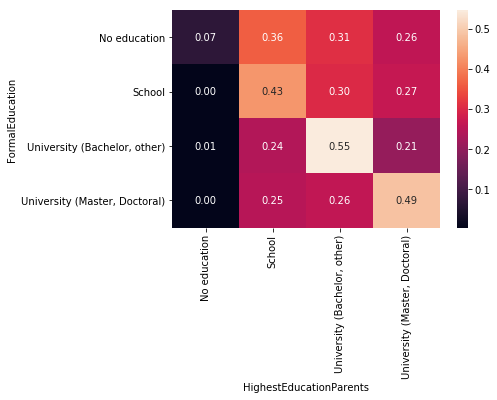

In [12]:
# plot correlation
sns.heatmap(df1, annot=True, fmt=".2f");

### Question 2

Do people who choose a technical career path (developers, anlysts) have certain personal traits or preferences in common?

In [13]:
# choose columns of interest
list_of_characteristics_cols = ['ProblemSolving', 'BuildingThings', 'LearningNewTech', 
                                'UnderstandComputers', 'SeriousWork', 'KinshipDevelopers', 
                                'ChallengeMyself', 'CompetePeers', 'ChangeWorld']

df3 = df_original.copy()
df3 = df3[list_of_characteristics_cols]
df3 = df3.dropna(axis=0)
df3.head()

,ProblemSolving,BuildingThings,LearningNewTech,UnderstandComputers,SeriousWork,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld
0,Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Agree
2,Strongly agree,Strongly agree,Strongly agree,Disagree,Agree,Somewhat agree,Agree,Disagree,Agree
3,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree
8,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Agree
14,Strongly agree,Strongly agree,Agree,Disagree,Agree,Somewhat agree,Agree,Somewhat agree,Somewhat agree


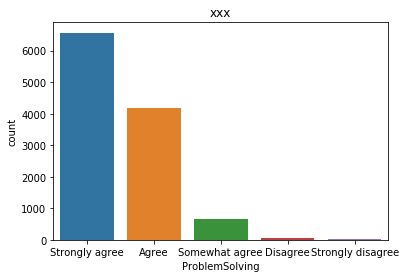

In [14]:
# testing single plot
sns.countplot(x="ProblemSolving",  data=df3).set(title='xxx');

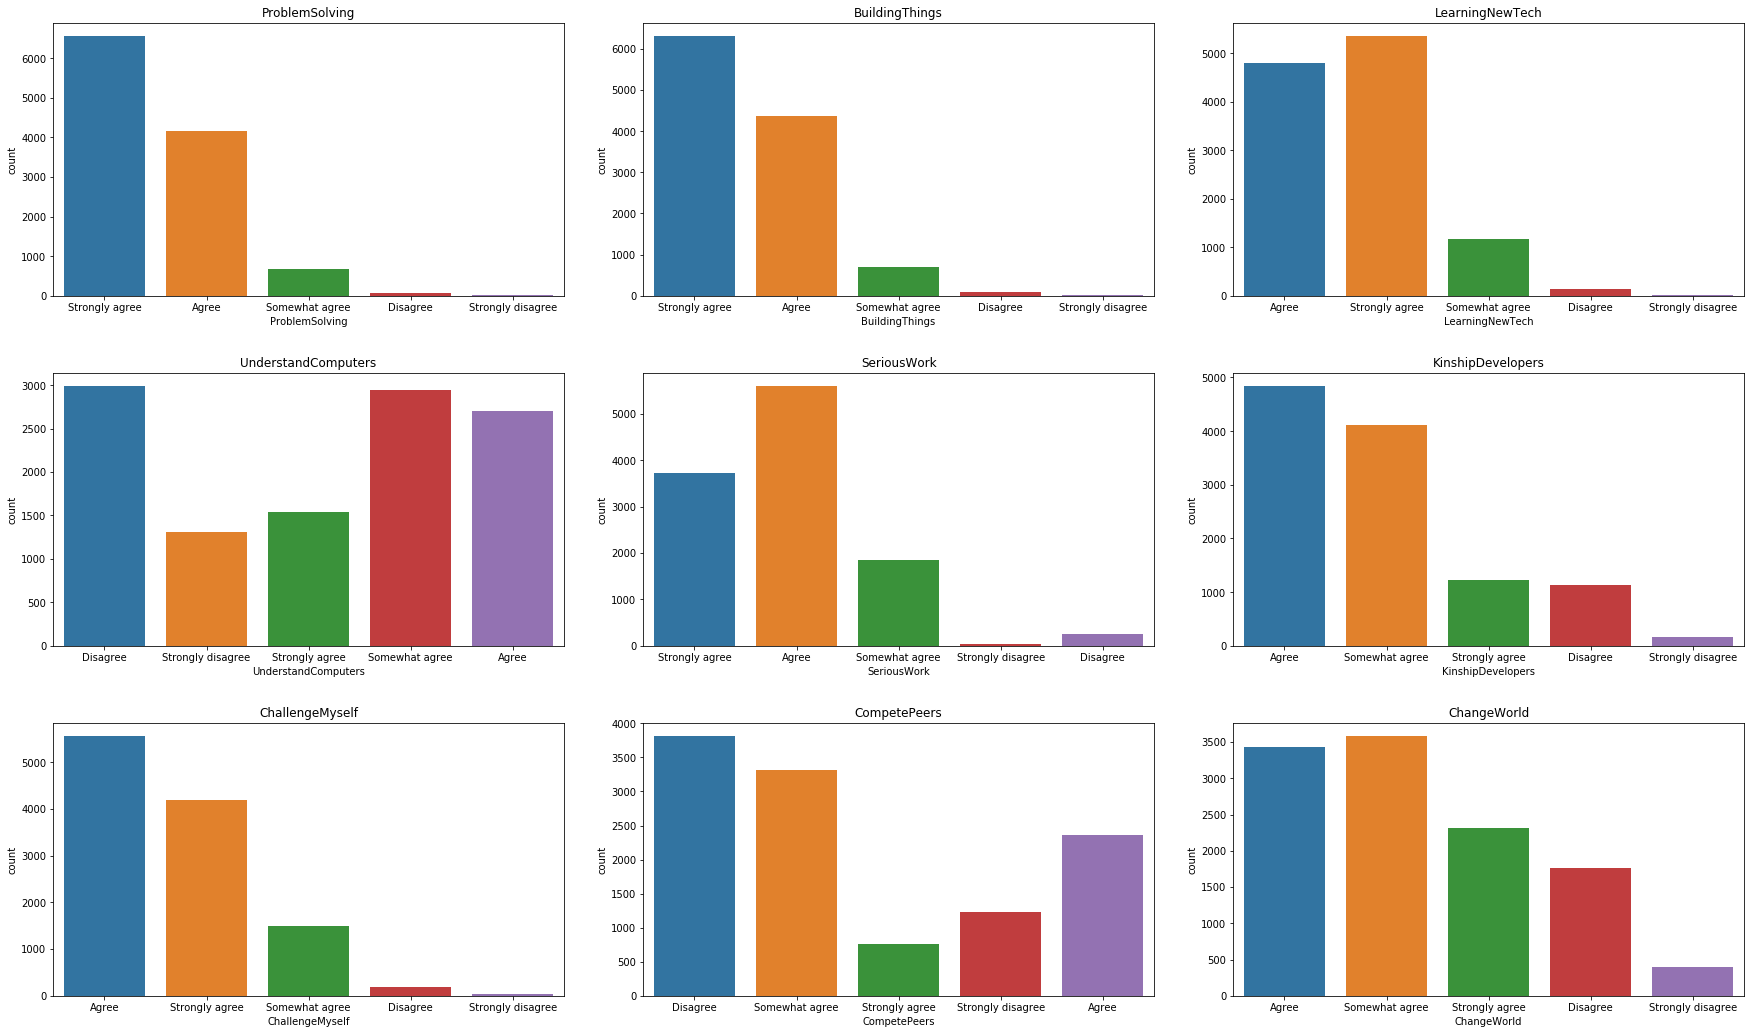

In [15]:
# plot all categorical features of interest
fig, axes = plt.subplots(3, 3, figsize = (25,15))

cc = 0
for i in range(3):
    for j in range(3):
        sns.countplot(ax=axes[i, j], x=list_of_characteristics_cols[cc],  data=df3).set(title=list_of_characteristics_cols[cc]);
        cc = cc+1

fig.tight_layout(pad=3.0)

## Question 3

Based on person's characteristics, can you predict if they enjoyed the survey?

In [16]:
# Column to predict
survey_judgement_cols = ['QuestionsInteresting']

In [17]:
# Features
person_cols = ['Professional', 'ProgramHobby', 'Country', 'EmploymentStatus', 'FormalEducation', 
               'CareerSatisfaction', 'StackOverflowSatisfaction', 'StackOverflowCommunity', 
               'StackOverflowHelpful', 'StackOverflowBetter', 'Gender', 'Race']

In [18]:
df = df_original.copy()

In [19]:
df = df[person_cols+survey_judgement_cols]

In [20]:
df.head()

,Professional,ProgramHobby,Country,EmploymentStatus,FormalEducation,CareerSatisfaction,StackOverflowSatisfaction,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,Gender,Race,QuestionsInteresting
0,Student,"Yes, both",United States,"Not employed, and not looking for work",Secondary school,NaN,9.0,Strongly agree,Agree,Strongly agree,Male,White or of European descent,Strongly agree
1,Student,"Yes, both",United Kingdom,Employed part-time,Some college/university study without earning ...,NaN,8.0,Strongly agree,Agree,Strongly agree,Male,White or of European descent,Somewhat agree
2,Professional developer,"Yes, both",United Kingdom,Employed full-time,Bachelor's degree,8.0,8.0,Strongly agree,Agree,Agree,Male,White or of European descent,Agree
3,Professional non-developer who sometimes write...,"Yes, both",United States,Employed full-time,Doctoral degree,6.0,10.0,Strongly agree,Strongly agree,Agree,Male,White or of European descent,Agree
4,Professional developer,"Yes, I program as a hobby",Switzerland,Employed full-time,Master's degree,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# drop rows with NaNs in response column
df = df.dropna(subset=['QuestionsInteresting'], axis=0)

In [22]:
y = df['QuestionsInteresting']
df = df.drop(['QuestionsInteresting'], axis=1)

In [23]:
# Fill numeric columns with the mean
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

In [24]:
# Dummy the categorical variables
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
   # for each cat add dummy var, drop original column
   df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

In [25]:
X = df
df.head()

,CareerSatisfaction,StackOverflowSatisfaction,Professional_Professional developer,Professional_Professional non-developer who sometimes writes code,Professional_Student,Professional_Used to be a professional developer,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",Country_Aland Islands,...,Race_Middle Eastern; White or of European descent,"Race_Native American, Pacific Islander, or Indigenous Australian","Race_Native American, Pacific Islander, or Indigenous Australian; White or of European descent",Race_South Asian,Race_South Asian; I don’t know,Race_South Asian; White or of European descent,Race_White or of European descent,Race_White or of European descent; I don’t know,Race_White or of European descent; I don’t know; I prefer not to say,Race_White or of European descent; I prefer not to say
0,7.416437,9.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,7.416437,8.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,8.000000,8.0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,6.000000,10.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,7.416437,6.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_leaf = 10), n_estimators = 4)
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=4, random_state=None)

In [28]:
# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_ 

In [29]:
# Predict
y_test_preds = model.predict(X_test)
y_train_preds = model.predict(X_train)

In [30]:
print("Accuracy on training data: {:.4f}".format(accuracy_score(y_train, y_train_preds)))
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, y_test_preds)))

Accuracy on training data: 0.5146
Accuracy on testing data: 0.4912


In [31]:
# Display the five most important features
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:5]]
values = importances[indices][:5]

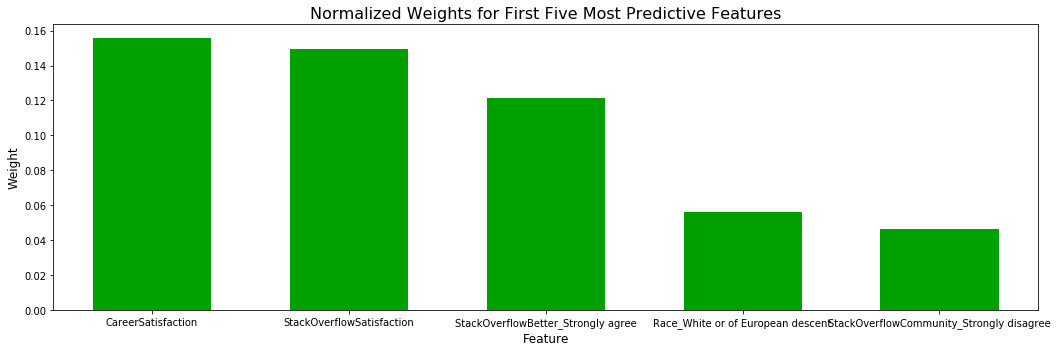

In [32]:
# Creat the plot
fig = plt.figure(figsize = (15,5))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000')
plt.xticks(np.arange(5), columns)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize = 12)
plt.xlabel("Feature", fontsize = 12)

plt.tight_layout()
plt.show()  

In [33]:
print(values)

[ 0.15577189  0.14950823  0.12112166  0.0560754   0.04659478]
